[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tamaragerber/climate_archives/blob/main/ice-stratigraphy_exercise.ipynb)


# Glaciers and ice sheets as climate archives - Ice-sheet stratigraphy


In [1]:
# Install ipympl so that we can use interactive plots
!pip install ipympl
# And activate
from google.colab import output
output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.8/515.8 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.4 MB/s eta 0:00:00


**Important!** If this is the first time you are running the Notebook, restart your session now using the menu 'Runtime... Restart session'. You don't need to run the above cell again afterwards, you can continue with the rest of the Notebook.



In [1]:
# --- file download ---
import requests
import os
files = {'EGRIP_timescale.csv': 'https://unils-my.sharepoint.com/:x:/g/personal/tamara_gerber_unil_ch/IQDnsEb__CS8RKtWEA3IU4_ZAZNQdJVPLVPL7H2z6Jl3o68?download=1',
         'greenland_flowline.csv': 'https://unils-my.sharepoint.com/:x:/g/personal/tamara_gerber_unil_ch/IQDWyGVKQydKQIm3fq_1ARvMAWp8YmhfM1WU5002ZCeIC1Q?download=1'
}

for f in files:
    print('Downloading...')
    response = requests.get(files[f])
    open(f, 'wb').write(response.content)
print('Done.')



Downloading...
Downloading...
Done.


Ice cores preserve detailed records of past climate because the isotopic and chemical composition of snowfall remains largely unchanged once it is buried and transformed into glacier ice. To interpret these records we need to know the age of the ice. Establishing a reliable relationship between depth and time (ice-core timescales) is therefore essential.

As layers of snow are buried, they are gradually compressed and carried downward by the flow of the ice. During this process, layers thin vertically and stretch horizontally under the weight of the overlying ice. Consequently, the age of the ice does not increase linearly with depth, since annual layers become progressively thinner with depth. This relationship between depth and age can be described using theoretical flow and accumulation models.

Let's consider the following parameters:

- $H$ = ice thickness  
- $\dot{b}$ = accumulation rate (m/yr of ice)  
- $z$ = elevation above bed  
- $z(a)$ = elevation of a layer with age $a$
- $\lambda(a)$ = current thickness of a layer (isochrone) with age $a$   
- $t$ = time, where $t = 0$ is present day and $t = -a$ is the time at which a layer of age $a$ was deposited  


<p align="center">
<img src="attachment:cb1ae39d-7b6b-4f8e-9fb8-f200bd749b3e.png" width="75%">
</p>


A layer moves downward with the vertical velocity $w(z)$ and, assuming the layers remain horizontal, the thinning rate is:
$$\frac{d\lambda}{dt}= \dot{\epsilon}_{zz}\lambda,$$
whereby the vertical strain rate $$\dot{\epsilon}_{zz} = \frac{\partial w}{\partial z}$$ varies with time and depth as the layer moves.

By integrating the above equation from initial ($\lambda_0 = \dot{b}$) to present thickness ($\lambda(a)$), and from age $-a$ to present day, we can obtain an expression for the annual layer thickness:
<details>
$$ \int_{\dot{b}}^{\lambda(a)} \frac{1}{\lambda}d\lambda = \int_{-a}^{0}\dot{\epsilon_{zz}}dt$$

$$\ln\left(\frac{\lambda(a)}{\dot{b}}\right) = \int_{-a}^0\dot{\epsilon_{zz}}dt$$

</details>

$$\lambda(a) = \dot{b}\exp\left(\int_{-a}^0\dot{\epsilon_{zz}}dt\right)$$

The depth of a certain age layer equals the sum of the thicknesses of the overlying, younger layers. In other words, the depth of a layer of given age depends on the subsequent accumulation, integrated over time, and the cumulative strain of those layers. To apply these equations, we need an ice-flow model that provides the strain rates or vertical velocities.


---
### Nye model

In a very simple model (Nye 1963) we can make two assumptions: 1) the vertical strain rate along any vertical line in the ice is uniform at any time and 2) there is no melting at the base of the ice sheet. This means that the vertical velocity $w$ at the surface ($z=H$) corresponds to the negative accumulation rate $\dot{b}$, and is zero at the bed ($z=0$).

It follows
$$\frac{dw}{dz} = -\frac{\dot{b}}{H}, $$

and
$$ w(z) = -\frac{\dot{b}z}{H}.$$

Then, the expression for the annual layer thickness becomes
$$\boxed{ \lambda(a) = \dot{b}\exp\left(\frac{-\dot{b}a}{H}\right) }$$

---
### Exercise 1)

Plot the relationship between annual layer thickness and age using the above equations. What is the thickness of an annual layer deposited 9000 years ago, assuming that the climate was constant in time, the accumulation rate is 20 cm ice equivalent per year, and the ice thickness is 2500 m?

annual layer thickness for 9000 yrs: 0.09735045119199434


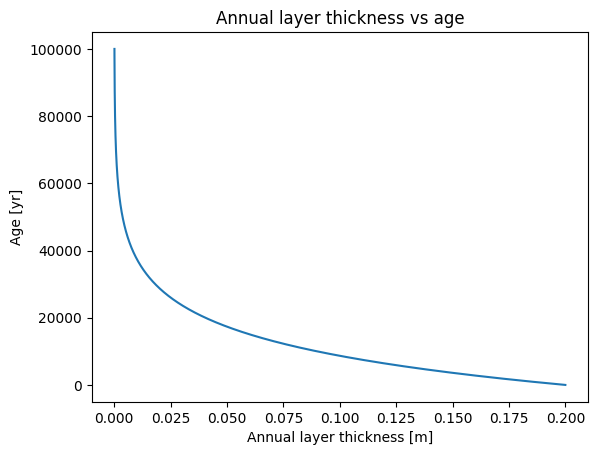

In [5]:
# --- solution exercise 1 ---
import numpy as np
import matplotlib.pyplot as plt

a =    np.arange(0,100000,1) # age
b =     0.2 # accumulation rate
H =     2500  # ice thickness
lda =   b * np.exp((-b*a)/H)# annual layer thickness, using equation above


# --- plot the annual layer thickness vs age. ---
plt.plot(lda, a)
plt.xlabel('Annual layer thickness [m]')
plt.ylabel('Age [yr]')
plt.title('Annual layer thickness vs age')

# --- calculate layer thickness for a=9000 years. ---
a2 = 9000
lda9000 =   b * np.exp((-b*a2)/H)
print("annual layer thickness for 9000 yrs:", lda9000)

### *Solution Exercise 1):*


*(annual layer thickness 9000 yrs ago is: 9.7cm)*



---
## Depth-age relationship

The depth of a certain layer equals the sum of the thicknesses of the overlying younger layers. From the Nye model above, we can derive an expression for this depth-age relationship by integrating over layer thicknesses:
<details>
$$d(a)= \int_0^a \lambda(a')da'= \int_0^a \dot{b}\exp\left(-\frac{\dot{b}a'}{H}\right)da'$$

With integral substitution $u = -\frac{\dot{b}a'}{H} \Longrightarrow du = -\frac{\dot{b}}{H}da' \Longrightarrow da' = -\frac{H}{\dot{b}}du$, the above integral becomes:

$$ d(a) = \dot{b}\int_{u=0}^{u=-\dot{b}a/H}\exp(u)\left(-\frac{H}{\dot{b}}\right)du$$

$$d(a) = -H \int_0^{-\dot{b}a/H}\exp(u)du$$

$$d(a) = -H\left(\exp\left(-\frac{\dot{b}a}{H}\right)-1\right)$$
which can be simplified to
</details>
$$\boxed{d(a) = H\left(1-\exp\left(-\frac{\dot{b}a}{H}\right)\right)}.$$

This equation can be re-arranged to express age as a function of depth:

$$\boxed{ a(d) = -\frac{H}{\dot{b}}\ln\left({1-\frac{d}{H}}\right)}.$$


### Exercise 2)

I am interested in drilling an ice core on a small ice cap. The ice thickness is 900 m, the accumulation rate is 12 cm/yr ice equivalent.

a) Assuming that changes in the accumulation rate over time are negligible, at what depth can I expect to find ice from the most recent glacial period (>11000 years ago) according to the Nye model?

b) In a radargram you can identify intact stratigraphy until 150 m above the bed. What is the oldest ice you expect to find with intact stratigraphy?

c) My measurement technique for ice impurities has a depth resolution of 1 cm. Will I be able to resolve annual layers in this deepest part?

depth at last glacial period: 692.3484509430353
max age of intact stratigraphy: 1394.6471957138108
resolution of annual layer 150m above bed: 0.096


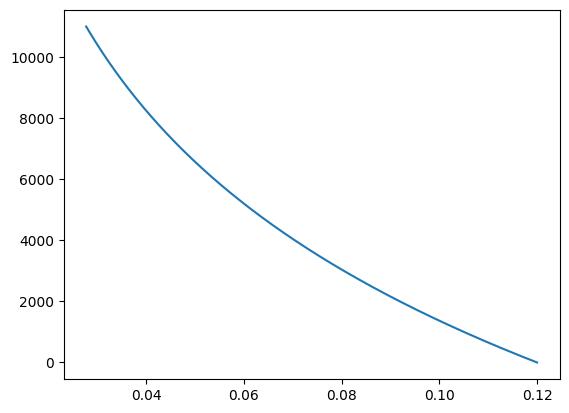

In [15]:
# --- solution exercise 2 ---

a =   np.arange(0,11000,1) #age
H =  900 #ice thickness
b =  0.12 #accumulation rate
lda = b * np.exp((-b*a)/H) #annual layer thickness

d =  H*(1-np.exp(-(b*a)/H)) #depth

# --- at what depth do I find ice from last glacial period? ---
print("depth at last glacial period:", d[-1])

# --- max age of intact stratigraphy ---
H2 = 750
a2 = -H2/b * np.log(1-150/H2)
print("max age of intact stratigraphy:", a2)

# --- can i resolve annual layers 150 m above the bed? ---
annual_layers = b * np.exp((-b*a2)/H2)
print("resolution of annual layer 150m above bed:", annual_layers)
plt.plot(lda, a)

### *Solution Exercise 2):*

2a)
*(depth at last glacial period: 692m)*

2b)
*(max age of intact stratigraphy: 1394 yrs)*

2c)
*(resolution of annual layer 150m above bed: 0.096, therefore yes, 9.6cm is enough to capture 1cm resolution)*

---
### Exercise 3)

The file `EGRIP_timescale.csv` provides the age–depth scale for the EastGRIP ice core. Estimate the past accumulation rates assuming no ice flow, a constant ice thickness of 2665 m, and zero basal melt. Plot the annual layer thickness as a function of depth and the inferred accumulation rate as a function of time, and briefly describe your observations.

Hint: The annual layer thickness can also be inferred from the depth-age relationship $\lambda = \frac{\Delta_{depth}}{\Delta_{age}}$. In Python, you can calculate this type of ratio using the gradient function: $\frac{\Delta_{x}}{\Delta_{y}} = $ `np.gradient(x,y)`.

Alternatively, the annual layer thickness can also be expressed as a function of depth:
$$\lambda(d) = \dot{b} (1-\frac{d}{H})$$



/tmp/ipython-input-176611486.py:14: RuntimeWarning: invalid value encountered in divide
  lda = np.gradient(depth/age) #annual layer thickness


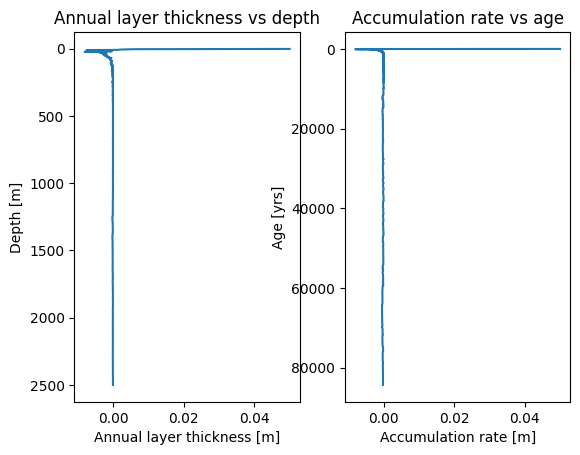

In [39]:
# --- solution exercise 3 ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load the data ---
df = pd.read_csv("EGRIP_timescale.csv")  # columns: 'depth', 'age'
depth = df['depth'].values  # in meters
age = df['age'].values      # in years

H =  2665                       # ice thickness in m

# --- annual layer thickness: ---
lda = np.gradient(depth/age) #annual layer thickness

# --- plot annual layer thickness vs depth ---

plt.figure()
plt.subplot(1,2,1)
plt.plot(lda, depth)
plt.gca().invert_yaxis()  #invert depth
plt.xlabel('Annual layer thickness [m]')
plt.ylabel('Depth [m]')
plt.title('Annual layer thickness vs depth')

# --- calculate past accumulation rate ---
b = lda / (1-depth/H)


# --- plot accumulation rate vs age ---
plt.subplot(1,2,2)
plt.plot(b, age)
plt.gca().invert_yaxis() #invert age
plt.xlabel('Accumulation rate [m]')
plt.ylabel('Age [yrs]')
plt.title('Accumulation rate vs age')
plt.show()


### *Solution Exercise 3)*

3) *accumulation rate: how much is accumulated at the surface
     annual layer thickness: how the layers are thinning with increasing depth
     on the plots, both features decrease drastically after the surface layer, even bouncing in the negative (which would mean melting), and relatively fast plateau at 0, maybe something with the import went wrong it seems very different compared to the above, non-realistic calculations*

---
### Dansgaard-Johnsen model

Up to this point, we have relied on strong simplifications. Now, let’s enrich the model by including additional processes: the basal melt rate $\dot{m}$, basal sliding $u_b$, and a more realistic vertical velocity profile. The Dansgaard–Johnsen model (1969) provides a framework to incorporate these factors, offering a closer representation of real ice flow while still remaining relatively simple and analytically solvable.

The strain-rate variation with depth, and therefore the thinning of layers, depends on the vertical profile of horizontal velocity ($u$) up- and downstream of the potential drill site. The Dansgaard-Johnsen model assumes that the vertical strain rate $\dot{\epsilon}_{zz}$ is constant from the surface to some height $z=h$ above the bed. For larger depths, it linearly decreases to zero at the bed.

The derivation of the model equations is presented below for those interested in the theoretical background.
A detailed understanding of these equations is not necessary for completing the exercise, so you may proceed directly to exercise 4 if you wish.

<details>

The horizontal velocity profile is
$$ u(x,z) = \begin{cases}
u_{sur}(x) & \text{if } h \leq z \leq H \\
u_{sur}(x)\left(f_b +(1-f_b)\frac{z}{h}\right) & \text{if } 0 \leq z \leq h.
\end{cases}$$

The incompressibility of ice states that $\dot{\epsilon}_{xx} + \dot{\epsilon}_{yy} + \dot{\epsilon}_{zz}  = \frac{du}{dx} + \frac{dv}{dy} + \frac{dw}{dz} = 0$. Let's consider a case of parallel flow ($\dot{\epsilon}_{yy} = \frac{dv}{dy} = 0$) and flow-perpendicular compression/extension is negligible. It then follows that $\dot{\epsilon}_{zz} = - \dot{\epsilon}_{xx} = -\frac{du}{dx}$, or
$$w(z) = - \int \frac{du}{dx}dz.$$

When looking at the horizontal velocity definition we can see that only the surface velocity $u_sur$ depends on x. We can thus introduce a term $\alpha = \frac{du_{sur}}{dx}$. Integrating the horizontal velocity gradient then results in the following equations for the vertical velocities:


$$
w(z) =
\begin{cases}
w_{bed} - \alpha\left(f_bz + \frac{z^2}{2h}(1-f_b)\right) & \text{if } 0 \leq z \leq h \\
w_{sur} + \alpha(H-z) & \text{if } h \leq z \leq H,
\end{cases}
$$

whereby the surface and basal velocities are
$$w_{bed} = -\dot{m} + f_b u_{sur}\frac{\partial E_b}{\partial x}$$
$$w_{sur} = -\dot{b} +u_{sur} \frac{\partial E_{s}}{\partial x}.$$

$\frac{\partial E_{s}}{\partial x}$ and $\frac{\partial E_b}{\partial x}$ are the slopes of the surface and bed topography respectively, $\dot{m}$ is the basal melt rate and $\dot{b}$ is the accumulation rate. Since at $z=h$ both vertical velocity equations for ice above and below height $h$ need to match, we can derive a term for $\alpha$:
$$\alpha = \frac{w_{bed}-w_{sur}}{H -\frac{1}{2}(1-f_b)}.$$

</details>

---
### Exercise 4)

The two cells below contain the parameters and equations of the Dansgaard-Johnsen model, as described in "Details" above. The code simulates isochrones, i.e. horizons of uniform age, with depth. By varying the parameters for accumulation rate $\dot{b}$, basal melt rate $\dot{m}$, basal sliding fraction $f_b$ and kink height $h_k$, answer the following questions:

a) Describe and show with an example how accumulation rate, basal melt rate, basal sliding fraction and vertical strain rate profile (kink height) affect the age-depth profile. What is another important control on the isochrone shape?  

b) If you want to drill an ice core with a high temporal resolution, what are the most important parameters to consider when selecting the drill site? What should you consider if you want to recover a record that extends as far back in time as possible? Describe, where in the world you would expect to find such conditions.

c) In the model below, we assume that accumulation rate, basal melt rate, basal sliding fraction, and kink height are constant both along the profile and through time.
In a few sentences, discuss when and where this assumption could be reasonable for establishing a depth–age relationship, and under what conditions it would break down.

d) Ice cores are often drilled on ice divides, where horizontal flow is minimal. Drawing on your discussion in question (c), explain how conditions differ in fast-flowing regions (e.g. at EastGRIP with surface velocities of ~55m/yr) and what consequences this has for interpreting climate-proxy records.


In [18]:

# --- parameters to modify ---
b = 0.2                 # Accumulation rate [m/yr]
m = 0.04                 # Basal melt rate [m/yr]
f_b = 0.1               # Basal sliding fraction
h_kink = 20.0         # Kink height in DJ profile [m]



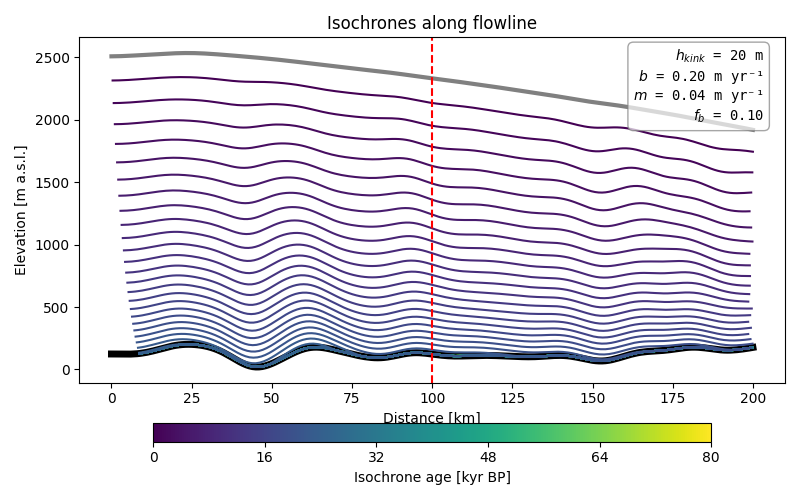

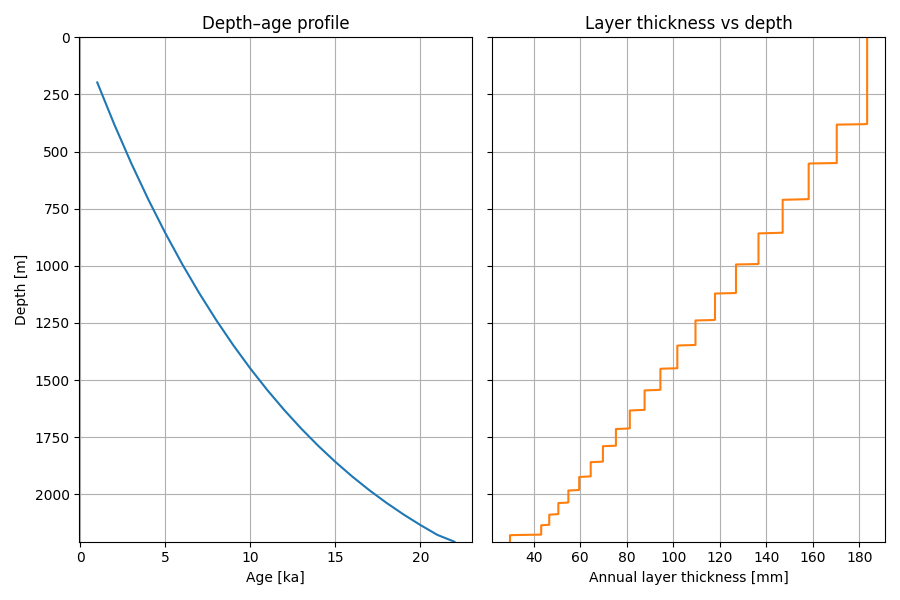

In [19]:
# ------------------------
# DJ-model
# ------------------------
%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d
import matplotlib.colors as mcolors

from google.colab import output
output.enable_custom_widget_manager()

#---------------------------
# model parameters
# --------------------------
t_iso = 80000.0         # Maximum isochrone age [yr]
int_iso = 1000          # Isochrone interval [yr]
dt = 100.0              # Integration timestep [yr]
x_core = 100000.0       # Ice-core location along flowline [m]

# ---------------------------
# 1. Load  geometry
# ---------------------------
df = pd.read_csv("greenland_flowline.csv")
x_grid = df["x"].values
bed = df["bed"].values
surface = df["surface"].values
u_sur = df["u_sur"].values
H_grid = surface - bed

# Slopes for DJ velocity
dE_s_dx = np.gradient(surface, x_grid)
dE_b_dx = np.gradient(bed, x_grid)

# ---------------------------
# 2. Interpolation function
# ---------------------------
def interp_on_grid(arr, xpos):
    """Linear interpolation on uniform flowline grid."""
    return np.interp(xpos, x_grid, arr, left=arr[0], right=arr[-1])

# ---------------------------
# 3. Velocity field functions
# ---------------------------
def horizontal_velocity(xpos, z):
    """Horizontal velocity u(x,z)"""
    scalar_input = np.isscalar(xpos) or np.isscalar(z)
    xpos_a = np.atleast_1d(xpos)
    z_a = np.atleast_1d(z)

    u_s = interp_on_grid(u_sur, xpos_a)
    u_b = f_b * u_s
    H_local = interp_on_grid(H_grid, xpos_a)
    h_local = np.clip(h_kink, 1e-6, H_local)

    u = np.empty_like(z_a)
    mask_lower = z_a <= h_local
    mask_upper = ~mask_lower

    # Linear layer near bed
    if np.any(mask_lower):
        zm = z_a[mask_lower]
        u[mask_lower] = u_b[mask_lower] + (u_s[mask_lower] - u_b[mask_lower]) * (zm / h_local[mask_lower])
    # Plug flow above kink
    if np.any(mask_upper):
        u[mask_upper] = u_s[mask_upper]

    return u[0] if scalar_input else u

def vertical_velocity(xpos, z):
    """Vertical velocity w(x,z) (positive downward)."""
    scalar_input = np.isscalar(xpos) or np.isscalar(z)
    xpos_a = np.atleast_1d(xpos)
    z_a = np.atleast_1d(z)

    H_local = interp_on_grid(H_grid, xpos_a)
    h_local = np.minimum(h_kink, H_local)
    u_s = interp_on_grid(u_sur, xpos_a)
    slope_s = interp_on_grid(dE_s_dx, xpos_a)
    slope_b = interp_on_grid(dE_b_dx, xpos_a)

    w_bed = -m + f_b * u_s * slope_b
    w_sur = -b + u_s * slope_s
    denom = H_local - 0.5*h_local*(1.0 - f_b)
    alpha = (w_bed - w_sur)/np.where(denom==0,1e-12,denom)

    w = np.empty_like(z_a)
    mask_lower = z_a <= h_local
    mask_upper = ~mask_lower

    # Lower part (near bed)
    if np.any(mask_lower):
        zm = z_a[mask_lower]
        w[mask_lower] = w_bed[mask_lower] - alpha[mask_lower]*(f_b*zm + (zm**2)/(2*h_local[mask_lower])*(1-f_b))
    # Upper part (plug layer)
    if np.any(mask_upper):
        z_u = z_a[mask_upper]
        w[mask_upper] = w_sur[mask_upper] + alpha[mask_upper]*(H_local[mask_upper]-z_u)

    # Enforce downward flow only
    w[w>0] = 0
    return w[0] if scalar_input else w

# ---------------------------
# 4. RK4 integration step
# ---------------------------
def rk4_step_vec(x, z, dt):
    """Vectorized RK4 advection step for multiple particles."""
    u1, w1 = horizontal_velocity(x,z), vertical_velocity(x,z)
    x1, z1 = x + 0.5*dt*u1, z + 0.5*dt*w1
    u2, w2 = horizontal_velocity(x1,z1), vertical_velocity(x1,z1)
    x2, z2 = x + 0.5*dt*u2, z + 0.5*dt*w2
    u3, w3 = horizontal_velocity(x2,z2), vertical_velocity(x2,z2)
    x3, z3 = x + dt*u3, z + dt*w3
    u4, w4 = horizontal_velocity(x3,z3), vertical_velocity(x3,z3)

    dx = dt/6 * (u1 + 2*u2 + 2*u3 + u4)
    dz = dt/6 * (w1 + 2*w2 + 2*w3 + w4)
    return x + dx, z + dz

# ---------------------------
# 5. Initialize and advect isochrones
# ---------------------------
isochrone_age = np.arange(-t_iso,0,int_iso)
isochrone_z = []  # heights above bed
isochrone_x = []

N = 1
for t in np.arange(-t_iso,0,dt):
    if np.isin(t, isochrone_age):
        # new isochrone at surface
        isochrone_z.append(H_grid.copy())
        isochrone_x.append(x_grid.copy())
        N += 1

    # Advect all existing isochrones
    for i in range(N-1):
        xnew, znew = rk4_step_vec(isochrone_x[i], isochrone_z[i], dt)
        xnew[xnew>x_grid[-1]] = np.nan  # clip beyond flowline
        # Clip z to remain within ice
        znew = np.clip(znew, 0, H_grid)
        isochrone_x[i] = xnew
        isochrone_z[i] = znew

# ---------------------------
# 6. Plot isochrones along flowline
# ---------------------------
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_grid/1000, surface, color='gray', label='Surface', linewidth=3)
ax.plot(x_grid/1000, bed, 'k', label='Bed', linewidth=5)

# --- color mapping for ages ---
norm = mcolors.Normalize(vmin=0, vmax=t_iso)
cmap = cm.viridis_r

for i, age in enumerate(np.linspace(0, t_iso, len(isochrone_x))):
    color = cmap(norm(age))
    ax.plot(
        isochrone_x[i]/1000,
        isochrone_z[i] + interp_on_grid(bed, isochrone_x[i]),
        color=color
    )

ax.axvline(x_core/1000, color='r', linestyle='--', label='Ice-core site')
ax.set_xlabel("Distance [km]")
ax.set_ylabel("Elevation [m a.s.l.]")
ax.set_title("Isochrones along flowline")

# --- parameter legend box ---
param_text = (
    f"$h_{{kink}}$ = {h_kink:.0f} m\n"
    f"$b$ = {b:.2f} m yr⁻¹\n"
    f"$m$ = {m:.2f} m yr⁻¹\n"
    f"$f_b$ = {f_b:.2f}"
)
ax.text(
    0.97, 0.97, param_text,
    transform=ax.transAxes,
    ha='right', va='top',
    fontsize=10, family='monospace',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", alpha=0.7, edgecolor="gray")
)

# --- colorbar for age ---
sm = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
cbar = fig.colorbar(
    sm,
    ax=ax,
    orientation='horizontal',
    fraction=0.046, pad=0.1, aspect=30
)
cbar.set_label("Isochrone age [kyr BP]")
cbar.set_ticks(np.linspace(0, t_iso, 6))
cbar.set_ticklabels([f"{t/1000:.0f}" for t in np.linspace(0, t_iso, 6)])
plt.tight_layout()
plt.show()

# ---------------------------
# 7. Depth–age profile at ice-core site
# ---------------------------
j_core = np.argmin(np.abs(x_grid - x_core))
H_core = surface[j_core] - bed[j_core]

# Depth of each isochrone below surface
iso_depths_core = H_core - np.array([z[j_core] for z in isochrone_z])
iso_ages_core = np.array([-age for age in isochrone_age])

# Remove NaNs and duplicates
mask_valid = np.isfinite(iso_depths_core)
iso_depths_core = iso_depths_core[mask_valid]
iso_ages_core = iso_ages_core[mask_valid]
depths_unique, idx_unique = np.unique(iso_depths_core[::-1], return_index=True)
idx_unique = len(iso_depths_core) - 1 - idx_unique  # convert back to original indices
ages_unique = iso_ages_core[idx_unique]

#depths_unique, idx_unique = np.unique(iso_depths_core, return_index=True)
ages_unique = iso_ages_core[idx_unique]

# Build interpolation
interp_func = interp1d(depths_unique, ages_unique, kind='linear', fill_value="extrapolate")

# Evaluate on uniform depth grid
depth_grid = np.arange(0, round(H_core))
age_profile = interp_func(depth_grid)

# ---------------------------
# 8. Annual layer thickness vs depth
# ---------------------------

# Compute annual layer thickness (lda)
dage = np.gradient(age_profile)  # [yr/m]
layer_thickness = 1.0 / np.where(dage == 0, np.nan, dage)  # [m/yr]

# Convert to mm/yr for better readability
layer_thickness_mm = layer_thickness * 1000.0

# Create side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(9, 6), sharey=True)

# --- (a) Depth–age profile ---
axs[0].plot(ages_unique / 1000, depths_unique, color='C0')
axs[0].set_xlabel("Age [ka]")
axs[0].set_ylabel("Depth [m]")
axs[0].set_ylim([H_core, 0])
axs[0].set_title("Depth–age profile")
axs[0].grid(True)

# --- (b) Annual layer thickness ---
axs[1].plot(layer_thickness_mm, depth_grid, color='C1')
axs[1].set_xlabel("Annual layer thickness [mm]")
axs[1].set_title("Layer thickness vs depth")
axs[1].grid(True)

plt.tight_layout()
plt.show()

### *Solution Exercise 4)*

4a)
With increasing accumulation rate (e.g., 0.8 m/yr), layers are thicker, which leads to slower increasing age with depth.

With strongly increased basal melt (e.g., 0.5 m/yr), the depth-age profile becomes inverted, causing annual layer thickness to increase with depth, which is physically unrealistic. A basal melt of about 0.1 m/yr results in an almost linear depth-age relationship, representing the maximum threshold for basal melt. Higher basal melt reduces thinning, leads to thicker annual layers, and thus lower ages for the deepest ice layers.

A similar effect is observed with increased basal sliding, as it removes the lowest layers and reduces thinning.

Changing the vertical strain rate profile by varying the depth at which the maximum strain rate begins has less impact. The higher (deeper) this kink, the longer the maximum strain rate persists, resulting in faster compression and thinner layers.

other controls of isochrone shape:
- topography
- not only accumulation rate, but as well melting at the surface
- motion of the ice: building and closing of crevasses, moulins etc.

4b)If you want to drill an ice core with a high temporal resolution, what are the most important parameters to consider when selecting the drill site?

- very slow ice motion, to avoid crevasses/faults that could even lead to inversion of the layers
- thick ice
- as much accumulation as possible (low surface melt)

What should you consider if you want to recover a record that extends as far back in time as possible?
- ice thickness, same points as above, no basal melt

Describe, where in the world you would expect to find such conditions.
well, in Greenland and Antarctica.

4c)
Accumulation is never constant, maybe in very dry regions, but then it is not recommended to drill for ice cores.
Since the vertical strain rate was assumed to be constant only down to a certain depth and then decreases linearly, this behavior appears quite reasonable for an ice sheet as near the bed, vertical strain rate approaches 0 and other processes are more important. The kink height could be higher at the surface before achieving constant state and then decreasing again.
Basal melt rate could possibly be affected by the topography. Similarly for basal sliding friction, in addition to subglacial meltwater draining through the ice sheet, that could strongly increase sliding friction locally.

4d)
Areas with high ice motion are highly dynamic, deforming ice not only vertically but mainly horizontally leading to moulins, crevasses, faults, and efficient subglacial drainage. This processes disturb the age-depth profile and lead to much harder dating.

References:

Dansgaard, W., & Johnsen, S. J. (1969). A Flow Model and a Time Scale for the Ice Core from Camp Century, Greenland. Journal of Glaciology, 8(53), 215–223. doi:10.3189/S0022143000031208


Gerber, T. A., Hvidberg, C. S., Rasmussen, S. O., Franke, S., Sinnl, G., Grinsted, A., Jansen, D., and Dahl-Jensen, D.: Upstream flow effects revealed in the EastGRIP ice core using Monte Carlo inversion of a two-dimensional ice-flow model, The Cryosphere, 15, 3655–3679, https://doi.org/10.5194/tc-15-3655-2021, 2021.